In [6]:
import pandas as pd

reviews = pd.read_csv("../data/reviews.csv")
listings = pd.read_csv("../data/listings.csv")
neighborhoods = pd.read_csv("../data/neighbourhoods.csv")

listings.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3083,Room #2 - West Oakland,3518,Traci,NaN,Prescott,37.810130,-122.292660,Private room,125.0,1,78,2025-08-28,0.57,7,87,12,NaN
1,5739,Mod Studio,9276,Leah And Gyorgy,NaN,Adams Point,37.812663,-122.258047,Entire home/apt,95.0,4,333,2025-08-18,1.69,1,243,6,NaN
2,24916,Studio w/garden and Patio close to Rockridge,98716,Judy,NaN,Piedmont Avenue,37.831690,-122.251750,Entire home/apt,92.0,4,147,2025-09-01,0.79,2,194,2,NaN
3,29521,Elegant Rockridge Home,124220,Kymi,NaN,Shafter,37.836180,-122.255810,Entire home/apt,250.0,5,50,2025-08-07,0.29,1,25,9,NaN
4,30026,Temescal sunny townhome w/views every room 3 d...,98716,Judy,NaN,Temescal,37.834500,-122.262640,Entire home/apt,167.0,21,4,2023-06-12,0.03,2,269,0,NaN


In [22]:
listings['price'] = listings['price'].replace(r'\$','', regex=True)

In [32]:
listings = listings[[
    'id', 'name', 'host_id', 'neighbourhood', 'room_type', 
    'price', 'minimum_nights', 'number_of_reviews', 
    'availability_365', 'latitude', 'longitude'
]]

In [34]:
listings = listings.dropna()

In [36]:
listings.describe()

,id,host_id,price,minimum_nights,number_of_reviews,availability_365,latitude,longitude
count,1.937000e+03,1.937000e+03,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000
mean,5.866506e+17,1.489957e+08,229.833764,9.740320,60.715023,222.992256,37.809524,-122.237294
std,5.787344e+17,1.932442e+08,1816.029528,22.002282,105.925556,113.209683,0.026718,0.039404
min,3.083000e+03,2.852000e+03,18.000000,1.000000,0.000000,0.000000,37.729044,-122.324300
25%,3.226700e+07,7.573581e+06,78.000000,2.000000,2.000000,121.000000,37.794080,-122.268616
50%,6.427016e+17,4.624985e+07,110.000000,3.000000,17.000000,247.000000,37.810780,-122.247090
75%,1.137657e+18,2.306710e+08,160.000000,7.000000,71.000000,332.000000,37.829410,-122.206339
max,1.516905e+18,7.199058e+08,40000.000000,365.000000,969.000000,365.000000,37.867120,-122.121159


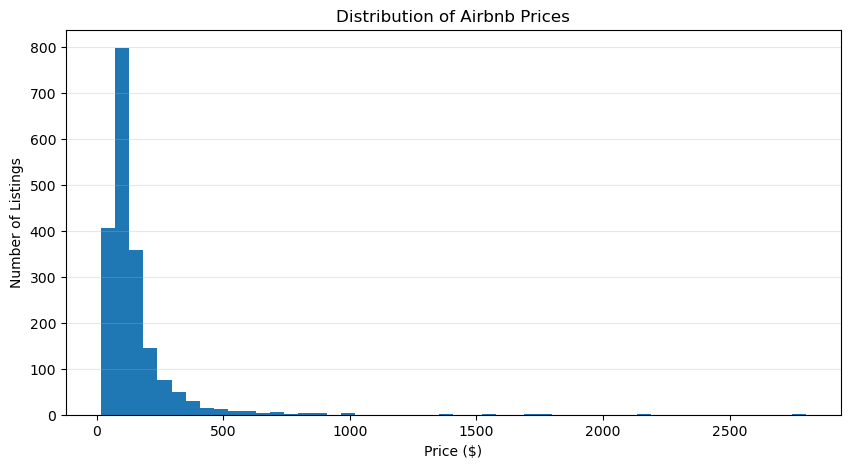

In [179]:
#price distribution

import matplotlib.pyplot as plt

filtered = listings[(listings['price'] >= 0) & (listings['price'] <= 3500)]

plt.figure(figsize=(10,5))
plt.hist(filtered['price'], bins=50)
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.grid(axis='y', alpha=0.3)
plt.title("Distribution of Airbnb Prices")
plt.show()

In [66]:
# Average price by neighborhood

listings.groupby('neighbourhood')

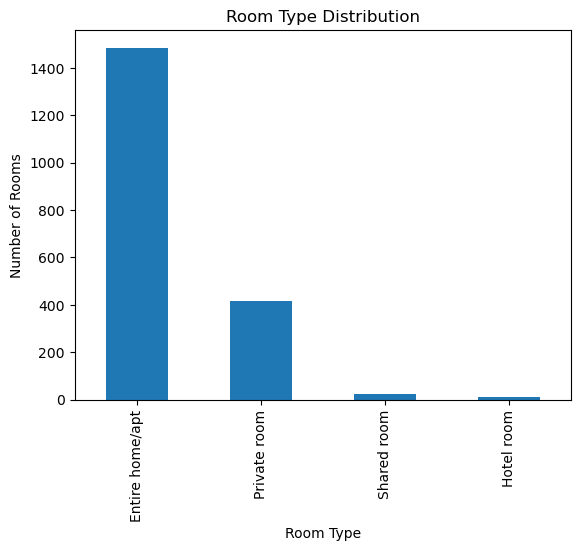

In [78]:
#Room type counts

listings['room_type'].value_counts().plot(kind='bar')
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Number of Rooms")
plt.show()

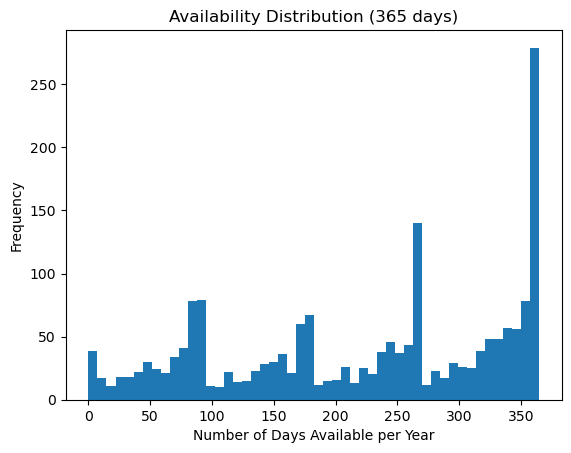

In [101]:
#Availability analysis

listings['availability_365'].plot(kind='hist', bins=50)
plt.title("Availability Distribution (365 days)")
plt.xlabel("Number of Days Available per Year")
plt.show()

In [ ]:
#1.Price vs Number of Reviews

plt.scatter(listings['number_of_reviews'], listings['price'])
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Reviews vs Price')
plt.show

In [ ]:
#Price map using scatterplt

plt.figure(figsize=(14,8))
sc = plt.scatter(listings['longitude'], listings['latitude'], c=listings['price'], cmap='viridis')
plt.colorbar(sc, label='Price($)')
        
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Price Patterns")
plt.show()